- Exploratory Data Analysis on Netflix dataset 

- This dataset has information about the TV shows and movies on Netflix from 2008 to 2021. It contains information about the category of content, cast, director, date added etc and it is analysed to get some useful insights

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df=pd.read_csv("../dataset/netflix_titles_2021.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [57]:
df.shape

(8807, 12)

This dataset has 8807 rows and 12 columns

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [59]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [60]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [61]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

- Director, cast and country have the most missing values.


In [62]:
df=df.fillna({'country':'missing','rating':'missing','duration':'missing'})

In [63]:
df.duplicated().sum()

0

There are no duplicated rows in this dataset

In [64]:
df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')
df['year_added']=df['date_added'].dt.year


In [65]:
df['type'].value_counts().to_frame('Count')

,Count
type,
Movie,6131
TV Show,2676


Shows how many tv shows and movies are there in the dataset

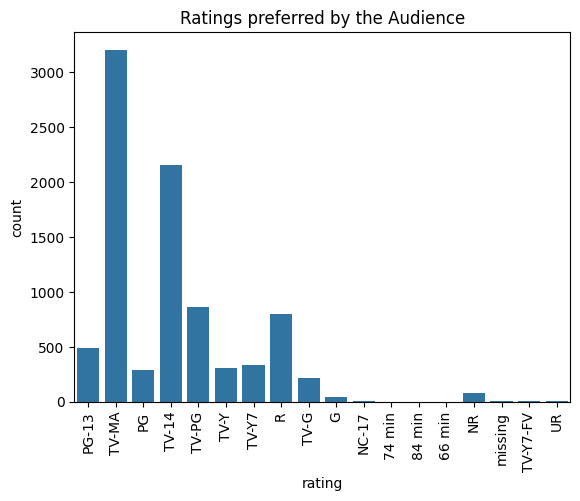

In [66]:
sns.countplot(x=df['rating'])
plt.title("Ratings preferred by the Audience")
plt.xticks(rotation=90)
plt.show()

TV-MA and TV-14 (suitable for adult audience) are the most preferred ratings, Nc-17 is the least preferred ratings

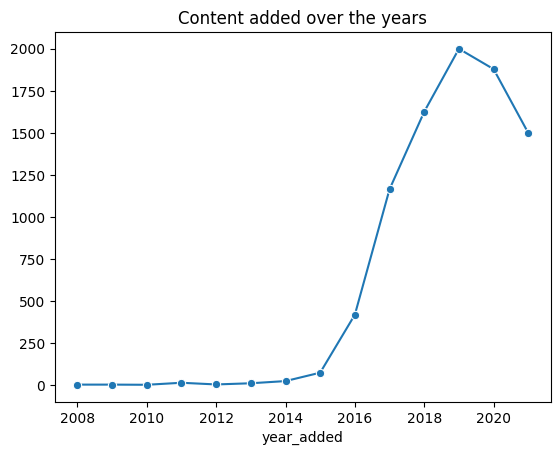

In [67]:
yearly_content=df.groupby('year_added').size()

sns.lineplot(x=yearly_content.index,y=yearly_content.values,marker='o')
plt.title('Content added over the years')
plt.show()

There is a rapid increase in the content added to netflix from the year 2016 onwards

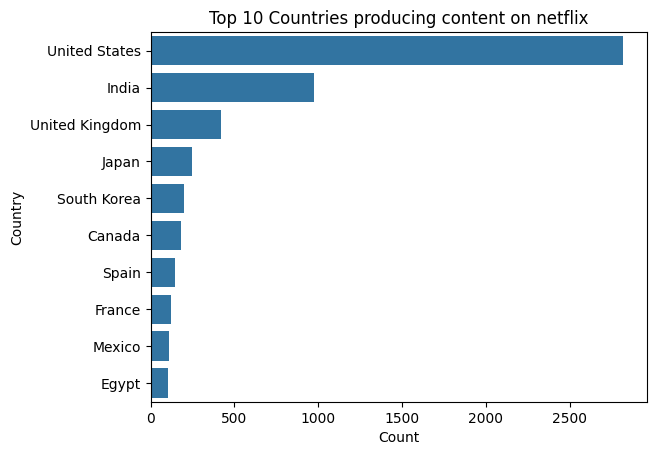

In [68]:
country_counts=df[df['country']!='missing']['country'].value_counts().head(10)
sns.barplot(x=country_counts.values,y=country_counts.index)
plt.title("Top 10 Countries producing content on netflix")
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

- United states is the country that produces most of the content for netflix

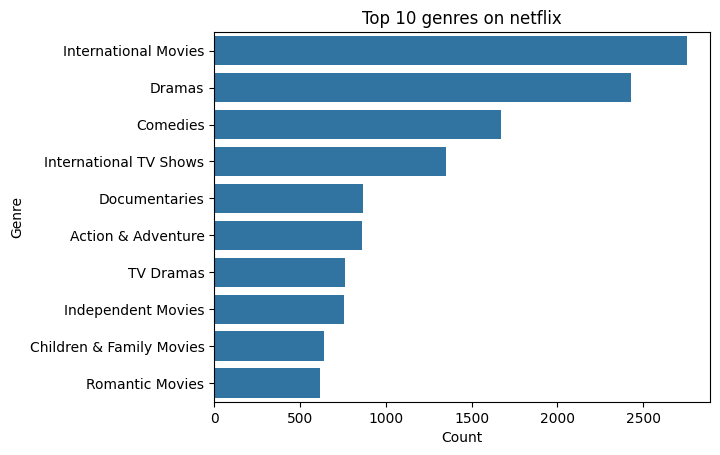

In [70]:
genre_series=df['listed_in'].str.split(', ')
genre_list=[]
for genres in genre_series:
    for g in genres:
        genre_list.append(g)
genre_counts=pd.Series(genre_list).value_counts().head(10)
sns.barplot(x=genre_counts.values,y=genre_counts.index)
plt.title("Top 10 genres on netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()        


- Drama and Comedy are typically the most watched genres and are more in number

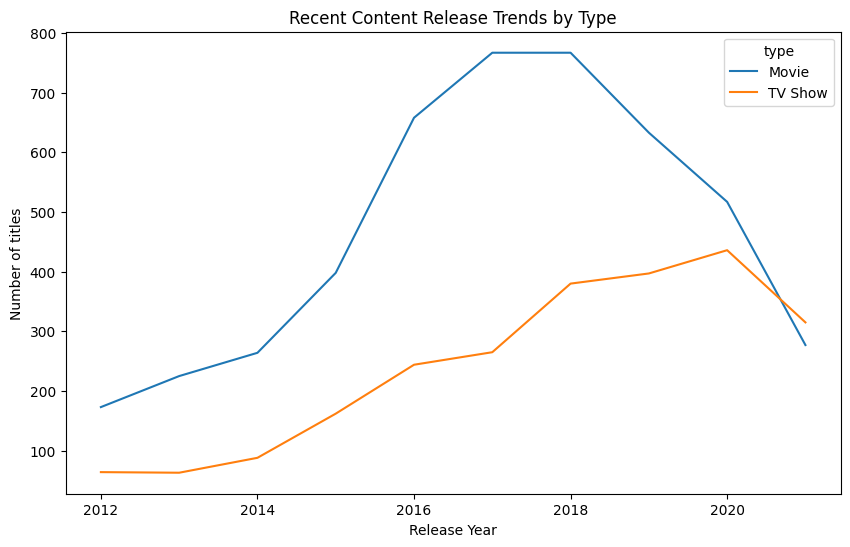

In [72]:
release_year_type=(df.groupby(['release_year','type']).size().unstack())
release_year_type.tail(10).plot(figsize=(10,6))
plt.title("Recent Content Release Trends by Type")
plt.xlabel("Release Year")
plt.ylabel("Number of titles")
plt.show()

In the recent years there is an increasing tv show releases and a slower growth for movies.
This indicates the shift towards episodic content and preference for binge-watching format.

Conclusions:

- Netflix is  movie-heavy but in recent times there is a gradual shift towards tv shows.
- Mature ratings dominate the platform (TV-MA, TV-14). so this indicates that netflix targets audience in the age range of 16 and above rather than children-focused content
- The content additions have increased sharply from 2016 when netflix entered its global expansion phase
- United States is the largest content contributor
- Drama and Comedy are the most watched genres.